# Project 1

#### Data Collection and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/dg/qy7075ls2lv5xq69xksqp9180000gn/T/ipykernel_82425/2809093686.py:5: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [2]:
rock = df.query("rock_genre == 'classic rock'")
rock

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
465,466,<verse_1> G C G C <chorus_1> C/D G Dmin C C/D ...,1963,'british blues' 'british invasion' 'classic ro...,1960.0,classic rock,artist_293,jazz,3f6KsfF6num3gcWlVAUDY2,5670CyWrIOA7702gNjsGMZ
478,479,<verse_1> Gmin D F C Cmin Bb A7 D7 <verse_2> G...,1994-01-01,'british blues' 'british invasion' 'classic ro...,1990.0,classic rock,artist_293,jazz,779vozNXnMDlOVIkga6rIe,5670CyWrIOA7702gNjsGMZ
9067,9068,<intro_1> G E7 Amin D7 G E7 Amin D7 <verse_1> ...,2012-01-01,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,5XcVPg8yyACsI28cS9sbxp,4STHEaNw4mPZ2tzheohgXB
10335,10336,<intro_1> G G/A G/B G/C D G G/A G/B G/C D G G/...,NaN,'classic rock' 'mellow gold' 'rock',NaN,classic rock,artist_5310,rock,NaN,4STHEaNw4mPZ2tzheohgXB
10922,10923,<intro_1> E A E <verse_1> B E B A B <chorus_1>...,2010-10-05,'classic rock' 'rock',2000.0,classic rock,artist_6138,rock,2ijHRr643f31GnagPYgcdE,4x1nvY2FN8jxqAFA0DA02H
...,...,...,...,...,...,...,...,...,...,...
634007,634008,<intro_1> G A E <verse_1> B G A E C G A <choru...,2021-04-16,'classic rock' 'mellow gold' 'rock',2020.0,classic rock,artist_5310,rock,4ByvgSH9KPxMQqqXFR9797,4STHEaNw4mPZ2tzheohgXB
634089,634090,<intro_1> A D A <verse_1> G Fs F E Ds D E A D ...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,6hOvsDkEEo0hvYDPt7Tpu8,4STHEaNw4mPZ2tzheohgXB
634096,634097,<instrumental_1> Fsmin Dmin Fsmin Dmin Fsmin D...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,3z5OdBycnAWmwACAhF1phF,4STHEaNw4mPZ2tzheohgXB
634097,634098,<intro_1> Amin <verse_1> D F A D F Amin <choru...,2020-12-18,'classic rock' 'mellow gold' 'rock',2010.0,classic rock,artist_5310,rock,18kdKpv7ZuLGoAy9tmcWi9,4STHEaNw4mPZ2tzheohgXB


In [3]:
import re

songs = rock["chords"]

#remove any <verse>/<chorus> tags from the chord data
cleaned_songs = [re.sub(r'<[^>]+>', '', song).strip() for song in songs]
#collapse multiple spaces into one
cleaned_songs = [' '.join(song.split()) for song in cleaned_songs]

#convert from string of chords to list where each index is chord
songs = [song.split() for song in cleaned_songs]
songs[0]


['G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'C/D',
 'G',
 'Dmin',
 'C',
 'C/D',
 'D',
 'G',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C',
 'G7',
 'C']

#### State Space

In [4]:
states = set()
for song in songs:
  new_states = set(song)
  states = states.union(new_states)

states = list(states)
len(states)

334

Across the 357 classic rock songs we are using to construct our Markov transition model, there are a total of 334 unique chords in our state space.

#### Tranistion matrix

In [5]:
S = len(states)

# Initialize transition count matrix
tr_counts = np.zeros((S, S))

# Count transitions across all trajectories
for song in songs:
    for t in range(1, len(song)):
        prev_state = song[t-1]
        curr_state = song[t]
        i = states.index(prev_state)
        j = states.index(curr_state)
        tr_counts[j, i] += 1

# Compute total outgoing transitions per state
sums = tr_counts.sum(axis=0, keepdims=True)

# Normalize to get transition probabilities (columns sum to 1)
tr_pr = np.divide(
    tr_counts, 
    sums, 
    out=np.zeros_like(tr_counts), 
    where=sums != 0
)

# Convert to DataFrame for readability
TM = pd.DataFrame(np.round(tr_pr, 3), index=states, columns=states)

print("Transition Proportions")
TM

Transition Proportions


,Eb/Bb,Ds,A/F,Ebmaj7,D,Bb,Csdim7,Dno3d/C,Caug,Dmin/F,...,E7/Gs,Bbsus2,C/G,G/E,Emin/B,G7/B,Bmin/Fs,Bmin/A,D/A,Gmin/Bb
Eb/Bb,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Ds,0.0,0.00,0.0,0.0,0.001,0.000,0.0,0.0,0.5,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
A/F,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Ebmaj7,0.0,0.00,0.0,0.0,0.000,0.013,0.0,0.0,0.0,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
D,0.0,0.25,0.0,0.0,0.000,0.011,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G7/B,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Bmin/Fs,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Bmin/A,0.0,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
D/A,0.0,0.00,0.0,0.0,0.008,0.000,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


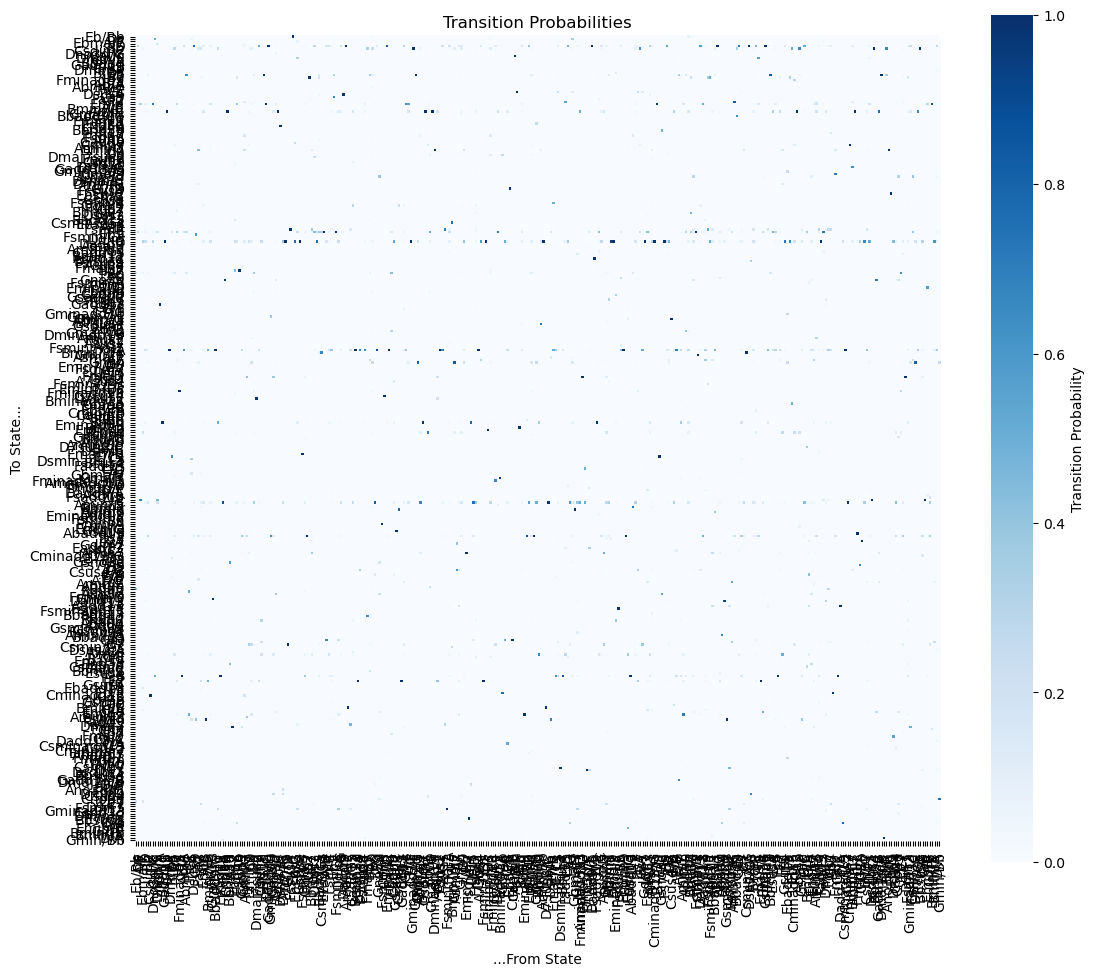

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...From State')
plt.ylabel('To State...')
plt.show()

#### Random Chord Generator

In [7]:
# Function to clean chord names so they are recognized by music21
def clean_chords(chords):
    cleaned = []
    for chord_symbol in chords:
        # Replace 'smin' with '#min'
        chord_symbol = chord_symbol.replace('smin', '#min')
        # Replace 'no3d' with '5'
        chord_symbol = chord_symbol.replace('no3d', '5')
        cleaned.append(chord_symbol)
    return cleaned

In [8]:
from music21 import harmony

MANUAL_MAPPINGS = {
    'Cminmaj7': 'CmM7',
    'Fsminmaj7': 'F#mM7',
}

def normalize_chord_string(chord_str: str) -> str:
    """
    Cleans up chord names to match what music21 expects.  
    Args:
        chord_str: A string containing a chord name
    Returns:
        A string containing a normalized chord name
    """
    original_str = chord_str.strip()
    
    #Check if this chord has a manual change
    if original_str in MANUAL_MAPPINGS:
        return MANUAL_MAPPINGS[original_str]
    normalized = original_str
    
    #Convert flat notes
    normalized = normalized.replace('Bb', 'B-')
    normalized = normalized.replace('Eb', 'E-')
    normalized = normalized.replace('Ab', 'A-')
    normalized = normalized.replace('Db', 'D-')
    normalized = normalized.replace('Gb', 'G-')
    
    #capitalize 'sus' terms so they don’t get changed in the next step.
    normalized = normalized.replace('sus4', 'SUS4')
    normalized = normalized.replace('sus2', 'SUS2')
    normalized = normalized.replace('sus', 'SUS')
    
    #sharp notation
    normalized = normalized.replace('s', '#')
    
    normalized = normalized.replace('maj#9', 'M#9')
    normalized = normalized.replace('maj7', 'M7')
    normalized = normalized.replace('maj9', 'M9')
    normalized = normalized.replace('min', 'm')
    normalized = normalized.replace('no3d', '5')

    #'7sus2' convert to '7add(sus2)'
    normalized = normalized.replace('7SUS2', '7add(sus2)')
    normalized = normalized.replace('M7SUS2', 'M7add(sus2)')
    
    #lowercase for suspended chords
    normalized = normalized.replace('SUS4', 'sus4')
    normalized = normalized.replace('SUS2', 'sus2')
    normalized = normalized.replace('SUS', 'sus')
    
    return normalized

### Checker for the chords to parse with Music21

In [9]:
successful_maps = {}
failed_maps = {}
for original_str in states:
    normalized_str = normalize_chord_string(original_str)
    try:
        # Try to parse the normalized chord using music21
        c = harmony.ChordSymbol(normalized_str)
        standardized_figure = c.figure
        successful_maps[original_str] = {
            'normalized': normalized_str,
            'music21_figure': standardized_figure,
        }          
    except Exception as e:
        failed_maps[original_str] = {
            'normalized': normalized_str,
            'error': str(e)
        }
print(failed_maps)

{}


In [10]:
states = [normalize_chord_string(s) for s in states]

In [11]:
import music21

## Random chords:
np.random.seed(100) 
initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 

n_sim = 20

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
    simulation.append(states[state_index]) # Append new state to simulation

new_chorale = [state.split()[-1] for state in simulation] # Convert to chords

new_chorale = clean_chords(new_chorale)

print(new_chorale)

# New random chorale
stream = music21.stream.Stream()
for chord_symbol in new_chorale:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  

Initial state: Caug
['Caug', 'B', 'E', 'A', 'D', 'E', 'F#m', 'Em', 'G', 'F#', 'E', 'A', 'E', 'A', 'D', 'G', 'B', 'Em', 'D', 'G']


### Higher Order Markov Chains by Artist

In [12]:
mayer = df.query("spotify_artist_id == '0hEurMDQu99nJRq8pTxO14'")
mayer.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
10647,10648,<verse_1> E13 Asus2 Bsus2 Fsmin9 E13 Asus2 Bsu...,2003-01-30,'neo mellow' 'singer-songwriter',2000.0,NaN,artist_6005,NaN,3ndvuL1lqZNTdb7yBxKQFR,0hEurMDQu99nJRq8pTxO14
64910,64911,<verse_1> Amin7 F7 G7 Amin7 <verse_2> F7 G7 Am...,2008,'neo mellow' 'singer-songwriter',2000.0,NaN,artist_6005,NaN,5e7ati4Dx5ax2YapfnV5FS,0hEurMDQu99nJRq8pTxO14
93075,93076,<intro_1> Bmin A G D <verse_1> G D G D A D G D...,2021-07-16,'neo mellow' 'singer-songwriter',2020.0,NaN,artist_6005,NaN,4f0xBbWvKWmuB17yebh24a,0hEurMDQu99nJRq8pTxO14
93734,93735,<intro_1> Dmin A/Cs Amin/C E Esus4 E <verse_1>...,2021-07-16,'neo mellow' 'singer-songwriter',2020.0,NaN,artist_6005,NaN,3hwjxbqGvTRUPi38fLgeM7,0hEurMDQu99nJRq8pTxO14
106766,106767,<verse_1> E Gsmin Csmin A E <verse_2> Gsmin Cs...,NaN,'neo mellow' 'singer-songwriter',NaN,NaN,artist_6005,NaN,NaN,0hEurMDQu99nJRq8pTxO14


In [13]:
mayer_songs = mayer["chords"]

#remove any <verse>/<chorus> tags from the chord data
cleaned_songs = [re.sub(r'<[^>]+>', '', song).strip() for song in mayer_songs]
#collapse multiple spaces into one
cleaned_songs = [' '.join(song.split()) for song in cleaned_songs]

#convert from string of chords to list where each index is chord
mayer_songs = [song.split() for song in cleaned_songs]
mayer_songs[0]

['E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'A',
 'Dmaj7',
 'E9',
 'A',
 'Dmaj7',
 'E9',
 'A/Fs',
 'Dmaj7',
 'A/Fs',
 'Dmaj7',
 'A/Fs',
 'Dmaj7',
 'Csmin7',
 'Asus2',
 'Asus2/Gs',
 'Csmin7',
 'Asus2',
 'Asus2/Gs',
 'Csmin7',
 'Asus2',
 'Asus2/Gs',
 'Fs11',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'E13',
 'Asus2',
 'Bsus2',
 'Fsmin9',
 'A',
 'Dmaj7',
 'E9',
 'A',
 'Dmaj7',
 'E9',
 'A/Fs',
 'Dmaj7',
 'A/Fs',
 'Dmaj7',
 'A/Fs',
 'Dmaj7',
 'Csmin7',
 'Asus2',
 'Asus2/Gs',
 'Csmin7',
 'Asus2',
 'As

In [39]:
order = 3
higher_order_songs = []
for song in mayer_songs:
  second_song = ['_'.join(song[(t-order-1):(t-1)]) for t in range(order+1, len(song))]
  higher_order_songs.append(second_song)

higher_order_songs[0]

higher_order_states = set()
for song in higher_order_songs:
  new_states = set(song)
  higher_order_states = higher_order_states.union(new_states)

higher_order_states = list(higher_order_states)
len(higher_order_states)

1791

In [40]:
S = len(higher_order_states)

# Initialize transition count matrix
tr_counts = np.zeros((S, S))

# Count transitions across all trajectories
for song in higher_order_songs:
    for t in range(1, len(song)):
        prev_state = song[t-1]
        curr_state = song[t]
        i = higher_order_states.index(prev_state)
        j = higher_order_states.index(curr_state)
        tr_counts[j, i] += 1

# Compute total outgoing transitions per state
sums = tr_counts.sum(axis=0, keepdims=True)

# Normalize to get transition probabilities (columns sum to 1)
tr_pr = np.divide(
    tr_counts, 
    sums, 
    out=np.zeros_like(tr_counts), 
    where=sums != 0
)

# Convert to DataFrame for readability
TM = pd.DataFrame(np.round(tr_pr, 3), index=higher_order_states, columns=higher_order_states)

print("Transition Proportions")
TM

Transition Proportions


,B7_E_D,Dsus2_Bsus2_Asus2,Ebmaj7_Fmaj7_Bbmaj7,C_F_Amin,G_A_Bmin,Fmaj7_Bb_Asus4,Fs7_A9_E9,Fs_Fs/C_B7,A_Aadd9_Asus2,Gsmin_Fs_B,...,E_F13_Aadd9,F_C/Bb_Bb,D_G_D,Gs_Aadd9_Cs,C_D_A,E_Fsmin_Fsmin9,A_Amin_D,D7/Fs_Gmin9_Dno3d,Fs_E_Asus2,Eno3d_F13_Gno3d
B7_E_D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dsus2_Bsus2_Asus2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ebmaj7_Fmaj7_Bbmaj7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C_F_Amin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G_A_Bmin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E_Fsmin_Fsmin9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A_Amin_D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D7/Fs_Gmin9_Dno3d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fs_E_Asus2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Connected Components in the 2nd order matrix

In [55]:
import networkx as nx
import numpy as np

G = nx.from_numpy_array(tr_pr, create_using=nx.DiGraph()) # Create directed graph in nx
is_connected = nx.is_strongly_connected(G) # Test connectivity
print(f"Connected: {is_connected}")

# Get connected components if not connected
if not is_connected:
    strong_components = list(nx.strongly_connected_components(G))
    print(f"Number of strongly connected components: {len(strong_components)}")

component_states = [higher_order_states[i] for i in strong_components[33]]
component_indices = [higher_order_states.index(s) for s in component_states]
component_states = [normalize_chord_string(s) for s in component_states]

component_tr_pr = tr_pr[np.ix_(component_indices, component_indices)]

Connected: False
Number of strongly connected components: 127


In [ ]:
## Random chords:
# np.random.seed(100) 
# initial_state = np.random.choice(higher_order_states) # Choose an initial state at random
# state_index = higher_order_states.index(initial_state) # Get the index of the initial state
# print(f'Initial state: {initial_state}') 

higher_order_states = [normalize_chord_string(s) for s in higher_order_states]


initial_state = "E9_F#7_A"
state_index = higher_order_states.index(initial_state)
print(f'Initial state: {initial_state}') 

n_sim = 20

simulation = [initial_state]
for t in range(n_sim-1): 
    pr_t = tr_pr[:,state_index] # Transition probabilities at this state
    state_index = np.random.choice(len(higher_order_states), p=pr_t) # Choose new state index
    simulation.append(higher_order_states[state_index]) # Append new state to simulation

new_chorale = [state.split()[-1] for state in simulation] # Convert to chords

new_chorale = clean_chords(new_chorale)

flat = []
is_first = True
for state in new_chorale:
    first, second, third = state.split('_', 2)
    if is_first:
        flat.append(first)
        flat.append(second)
        is_first = False

    flat.append(third)

print(new_chorale)
print(flat)

# New random chorale
stream = music21.stream.Stream()
stream.append(music21.instrument.ElectricGuitar())
for chord_symbol in flat:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi') 

Initial state: E9_F#7_A
['E9_F#7_A', 'F#7_A_Am', 'A_Am_D7', 'Am_D7_E9', 'D7_E9_Am', 'E9_Am_D7', 'Am_D7_E9', 'D7_E9_Am', 'E9_Am_D7', 'Am_D7_E9', 'D7_E9_Am', 'E9_Am_D7', 'Am_D7_E9', 'D7_E9_Am', 'E9_Am_D7', 'Am_D7_E9', 'D7_E9_Am', 'E9_Am_D7', 'Am_D7_E9', 'D7_E9_Am']
['E9', 'F#7', 'A', 'Am', 'D7', 'E9', 'Am', 'D7', 'E9', 'Am', 'D7', 'E9', 'Am', 'D7', 'E9', 'Am', 'D7', 'E9', 'Am', 'D7', 'E9', 'Am']
